<a href="https://colab.research.google.com/github/data04190/NC7-FaceEmoDetect-ex/blob/main/FaceEmoDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deepface

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from deepface import DeepFace
import json
import os

In [3]:
def show_emotion_and_graph(image_path):
    def detect_emotion(image_path):
        # 감정 인식 수행
        result = DeepFace.analyze(img_path=image_path, actions=['emotion'])
        return result[0]['emotion']

    def save_emotion_to_json(emotion_data, filename):
        # JSON 파일로 저장
        with open(filename, 'w') as json_file:
            json.dump(emotion_data, json_file)

    emotions = detect_emotion(image_path)

    # 이미지와 막대그래프를 함께 표시하기 위해 subplot 사용
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # 왼쪽에 이미지 표시
    ax[0].imshow(plt.imread(image_path))
    ax[0].axis('off')
    ax[0].set_title(image_path)

    # 오른쪽에 감정 결과를 막대그래프로 표시
    labels = list(emotions.keys())
    values = list(emotions.values())

    ax[1].bar(labels, values)
    ax[1].set_ylabel("Probability (%)")
    ax[1].set_title("Emotion Probabilities")
    ax[1].set_xticks(np.arange(len(labels)))
    ax[1].set_xticklabels(labels, rotation=45)

    plt.tight_layout()
    plt.show()

    # JSON 파일로 저장하기 위한 파일 이름 생성
    json_filename = os.path.splitext(os.path.basename(image_path))[0] + "_emotion_data.json"
    save_emotion_to_json(emotions, json_filename)

In [4]:
#이미지 업로드
from google.colab import files

uploaded = files.upload()

Saving anger3.png to anger3 (2).png
Saving sad.jpg to sad.jpg
Saving smile.jpg to smile (2).jpg
Saving test2.jpg to test2 (2).jpg


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.59it/s]


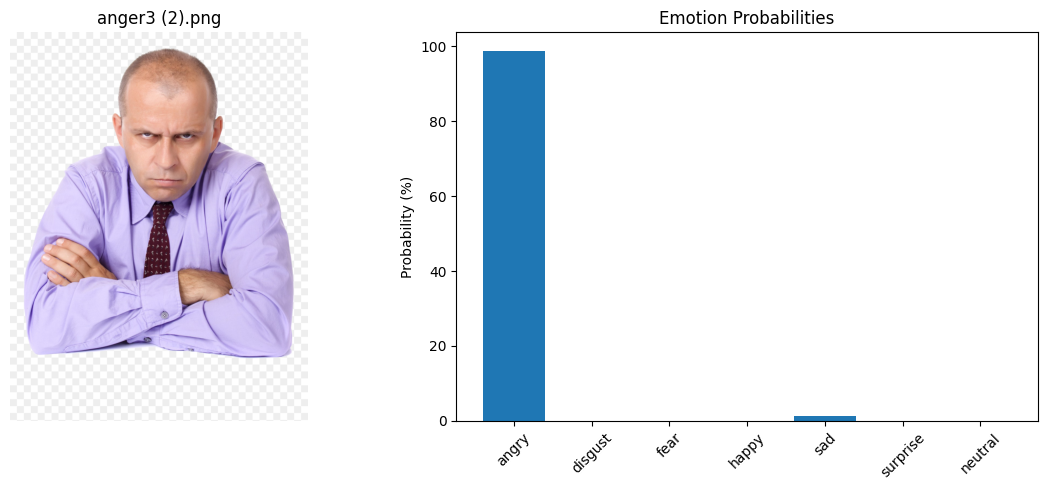

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.26it/s]


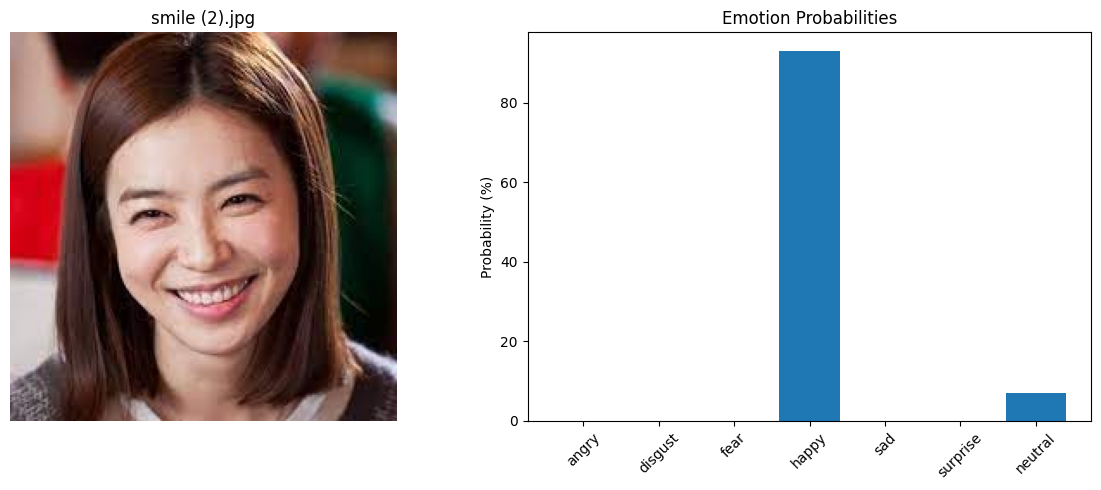

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.28it/s]


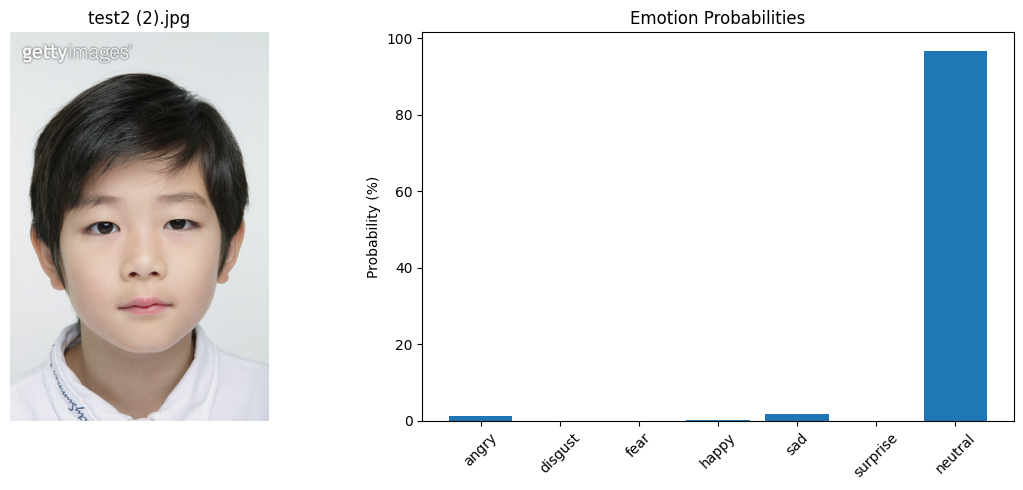

In [10]:
# 4개의 이미지에 대해 함수 호출
image_files = ["anger3 (2).png", "smile (2).jpg", "test2 (2).jpg"]

for image in image_files:
    show_emotion_and_graph(image)

In [11]:
for image in image_files:
    try:
        _ = plt.imread(image)
        print(f"{image} is read successfully.")
    except Exception as e:
        print(f"Error with {image}: {e}")


anger3 (2).png is read successfully.
smile (2).jpg is read successfully.
test2 (2).jpg is read successfully.


In [12]:
!ls *.json

'anger3 (2)_emotion_data.json'	'test2 (2)_emotion_data.json'
 anger3_emotion_data.json	 test2_emotion_data.json
 anger4_emotion_data.json	 test3_emotion_data.json
'smile (2)_emotion_data.json'	 test_emotion_data.json
 smile_emotion_data.json


In [13]:
# JSON 파일 리스트
file_names = ["anger3 (2)_emotion_data.json", "test2 (2)_emotion_data.json", "smile (2)_emotion_data.json"]

# 각 파일의 내용을 출력
for file_name in file_names:
    with open(file_name, 'r') as file:
        data = json.load(file)
        print(f"Contents of {file_name}:")
        print(data)
        print("-------------------------------------------------")

Contents of anger3 (2)_emotion_data.json:
{'angry': 98.7496139109595, 'disgust': 5.38562890881472e-11, 'fear': 0.002039115618325957, 'happy': 2.0015451352836416e-07, 'sad': 1.2191565185300686, 'surprise': 4.899156051904191e-07, 'neutral': 0.0291841069836489}
-------------------------------------------------
Contents of test2 (2)_emotion_data.json:
{'angry': 1.280022505670786, 'disgust': 2.0222861607521736e-06, 'fear': 0.11596513213589787, 'happy': 0.12367165181785822, 'sad': 1.7427897080779076, 'surprise': 0.0028405605917214416, 'neutral': 96.73471450805664}
-------------------------------------------------
Contents of smile (2)_emotion_data.json:
{'angry': 1.2253707163539795e-12, 'disgust': 1.3802269785104757e-17, 'fear': 7.859843710699267e-14, 'happy': 93.03402304649353, 'sad': 3.894079503297121e-08, 'surprise': 5.462285290747104e-07, 'neutral': 6.965982168912888}
-------------------------------------------------
